# Exploring Coordinate Descent Optimization:
Analyzing Convergence and Step Size Strategies

In [32]:
# Necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd # for data processing, working with dataframes

In [3]:
# 1. Load the Dataset:
data = pd.read_csv("Housing.csv")

In [4]:
# undertsanding the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# printing fisrt five values
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# printing last five values
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
# finding mean and standard deviation of the data
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# checking if there exist any null values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Drop null values from the DataFrame
data.dropna(inplace=True)


In [10]:
# checking if there exist any null values
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
# counting the non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()



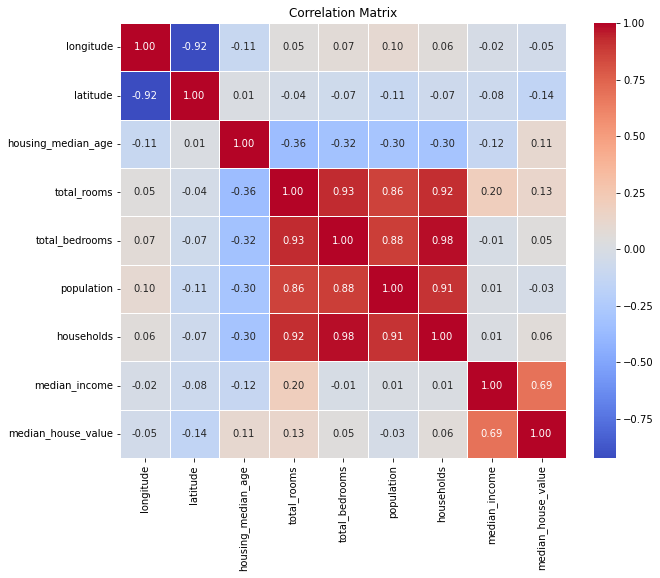

In [13]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


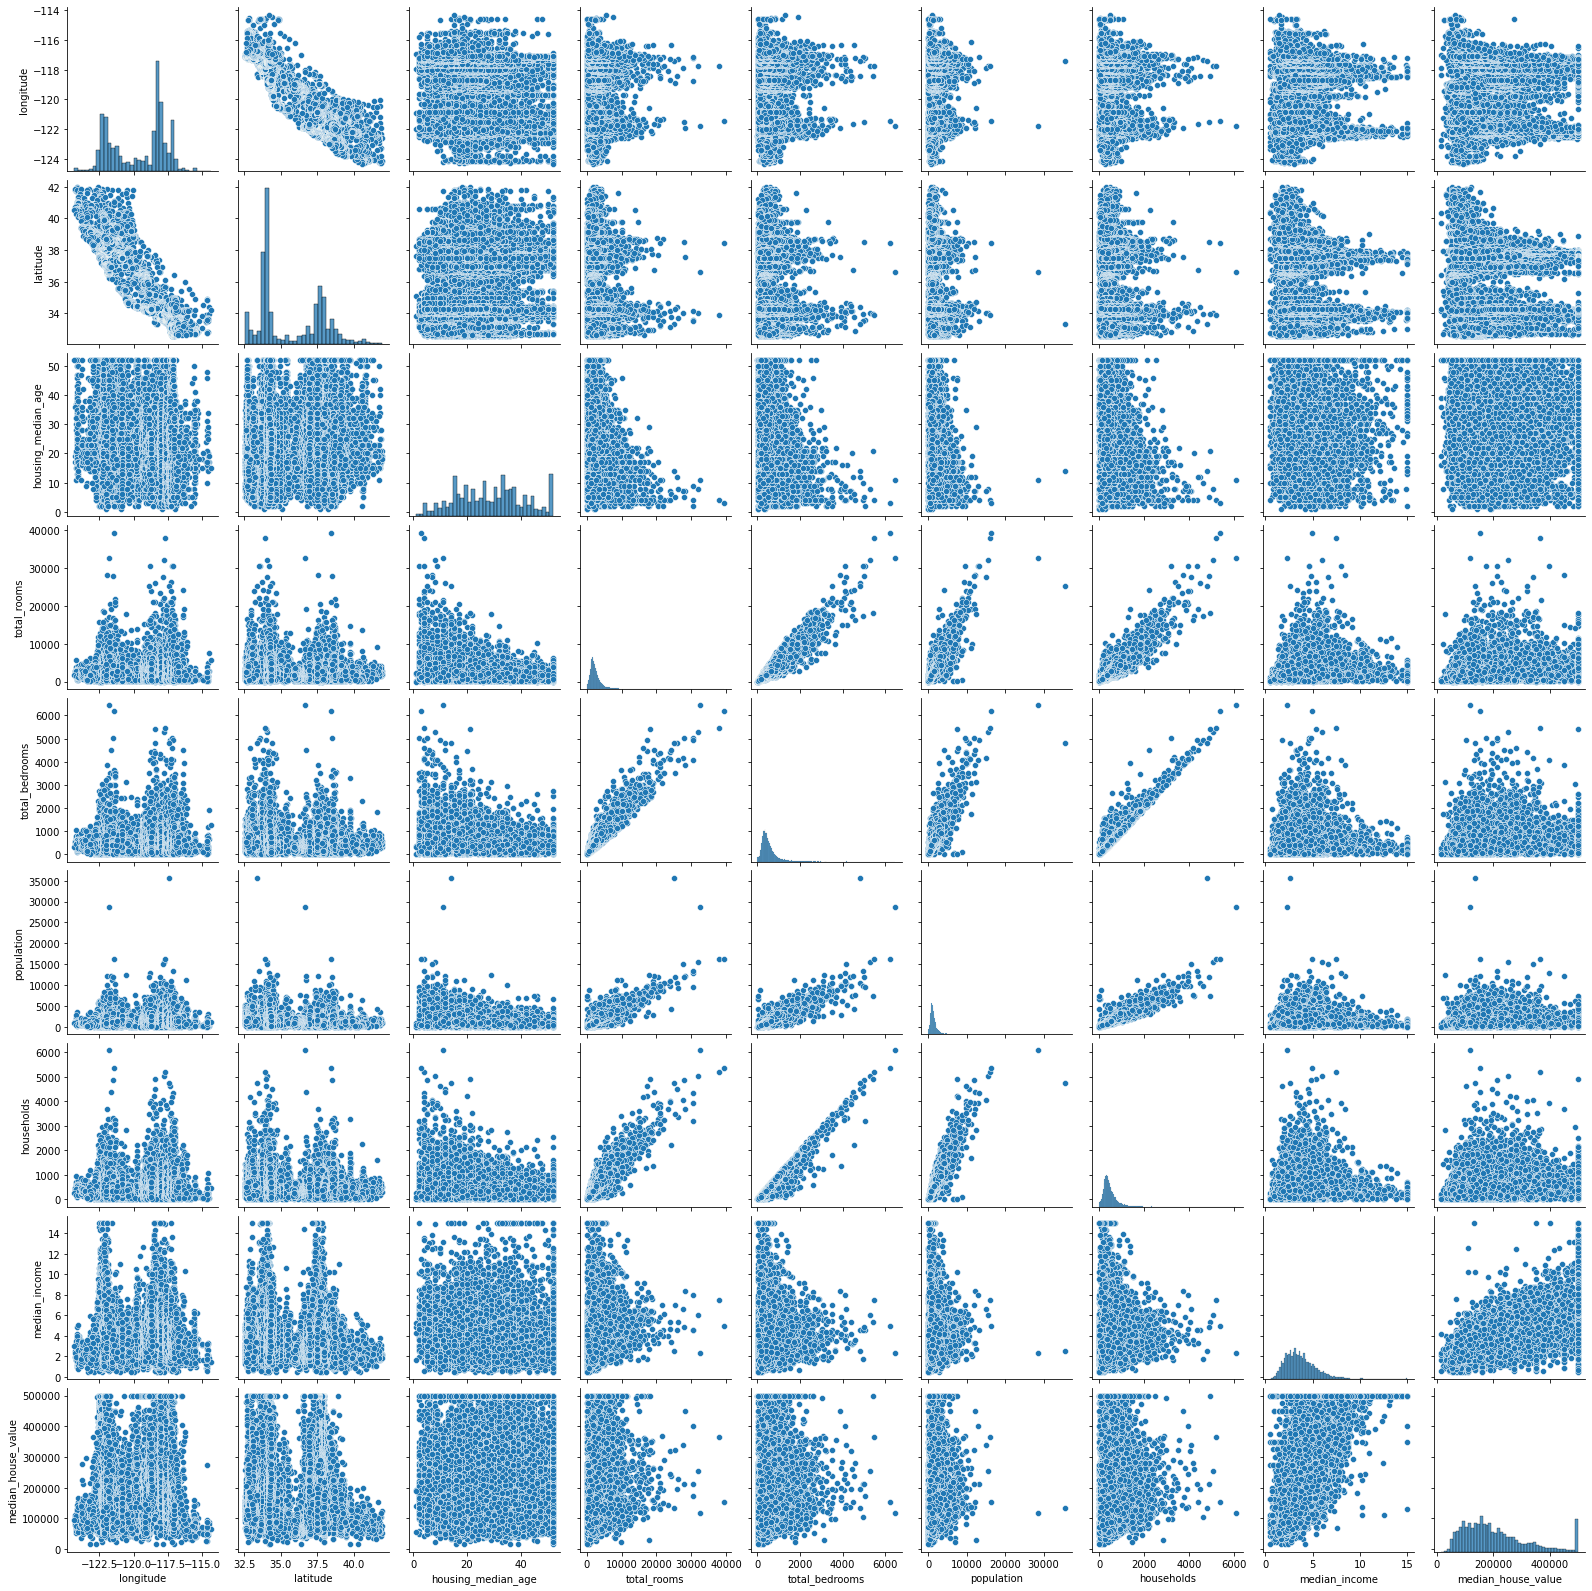

In [14]:

# Scatterplot Matrix
sns.pairplot(data)



In [15]:
# Extract features (independent variables) from the DataFrame
X = data.drop(columns=['median_house_value'])  # Drop the target column 'median_house_value'
# 'X' will contain all columns except 'median_house_value'

# Extract target variable (dependent variable) from the DataFrame
y = data['median_house_value']  # 'y' will contain only the 'median_house_value' column


In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming 'X_train' and 'X_test' contain your features

# Identify categorical columns (replace 'categorical_cols' with the actual names of your categorical columns)
categorical_cols = ['ocean_proximity']

# Identify numerical columns (replace 'numeric_cols' with the actual names of your numerical columns)
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# Preprocess categorical and numerical columns separately
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_cols),  # Standardize numerical columns
        ('categorical', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# Fit and transform preprocessing on training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform test data using the fitted preprocessing
X_test_scaled = preprocessor.transform(X_test)


LassoCV is used to perform coordinate descent with cross-validation to find the optimal alpha value.
Lasso is also applied directly with a fixed alpha value for comparison.
Predictions are made on the test set, and the mean squared error is calculated.
Feature importance is visualized using the coefficients of the Lasso model.
Predicted vs. actual values and residuals are plotted to evaluate the model's performance.

In [24]:
import numpy as np
from sklearn.linear_model import LassoCV



# Initialize the model
model = LassoCV(cv=5, random_state=42)

# Fit the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
predictions = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4793844393.186436


In [28]:
from sklearn.linear_model import Lasso # Apply the coordinate descent algorithm (Lasso Regression)
lasso_model = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optional: print model coefficients
print("Model coefficients:")
print(lasso_model.coef_)

Mean Squared Error: 4801426132.494035
Model coefficients:
[-54370.53541661 -54802.80164334  13601.80736814 -13593.25488907
  42990.01080251 -41114.07760496  16293.35080489  74533.67680067
   7773.1080079  -31471.69196054 215974.88584941   1530.33891569
  10929.61380321]


C:\Users\Dell\Downloads\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.270e+12, tolerance: 2.164e+10
  model = cd_fast.enet_coordinate_descent(


Here, an instance of the Lasso model is created with a regularization strength parameter alpha set to 1.0. The alpha parameter controls the degree of regularization: higher values mean more regularization, which can lead to more coefficients being shrunk to zero.The model is trained on the training data (X_train_scaled and y_train). The fit method adjusts the model parameters (coefficients) to best fit the training data, considering the regularization term.The predict method is used to make predictions on the test data (X_test_scaled). The predicted values are stored in y_pred.The Mean Squared Error (MSE) between the actual target values (y_test) and the predicted values (y_pred) is calculated. MSE is a measure of the average squared difference between the actual and predicted values. It is a common metric to evaluate the performance of regression models. The result is then printed.The coefficients of the trained Lasso model are printed. These coefficients represent the weights assigned to each feature in the model. Due to the L1 regularization, some of these coefficients may be exactly zero, indicating that those features have been excluded from the model. 
#Summary
The code demonstrates how to train a Lasso regression model with scaled training data, make predictions on scaled test data, and evaluate the model using the Mean Squared Error. Additionally, it prints the model coefficients, which can help in understanding the impact of each feature on the predictions and in feature selection due to the regularization effect of Lasso.

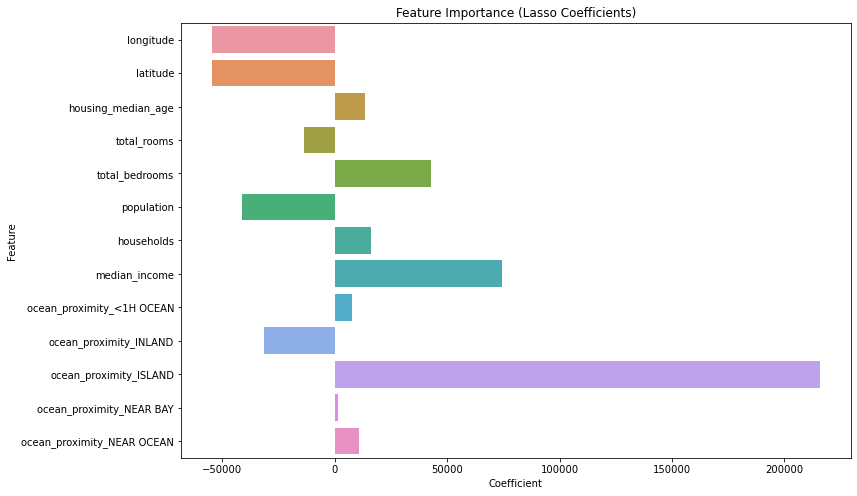

In [29]:
# Plot feature importance (coefficients)
coefficients = lasso_model.coef_
feature_names = numeric_cols + list(preprocessor.named_transformers_['categorical'].get_feature_names_out(categorical_cols))
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Lasso Coefficients)')
plt.show()

The code snippet you've provided demonstrates how to visualize the feature importance of a Lasso regression model using Python libraries such as pandas, seaborn, and matplotlib. Here's a breakdown of what each part does:

Extracting Coefficients: The line coefficients = lasso_model.coef_ retrieves the coefficients of the Lasso regression model. These coefficients represent the importance of each feature in predicting the target variable. A higher absolute value indicates greater importance.
Preparing Feature Names: The next lines prepare the names of the features that were used in the model. It combines the names of numerical columns (numeric_cols) with the names of categorical columns transformed by a named transformer (preprocessor.named_transformers_['categorical'].get_feature_names_out(categorical_cols)). This ensures that both types of features are correctly labeled in the plot.
Creating DataFrame: A pandas DataFrame (coef_df) is created to store the feature names and their corresponding coefficients. This DataFrame will be used to plot the feature importance.
Plotting with Seaborn: The seaborn library is used to create a bar plot (sns.barplot) where the x-axis represents the coefficient values (importance) and the y-axis represents the feature names. This visualization allows for easy comparison of how much each feature contributes to the prediction made by the Lasso model.
Customizing the Plot: Additional customization options are applied to the plot:
plt.figure(figsize=(12, 8)): Sets the figure size to 12 inches wide and 8 inches tall, providing ample space for the plot.
plt.title('Feature Importance (Lasso Coefficients)'): Adds a title to the plot, clearly indicating that it shows the feature importance based on Lasso coefficients.
Displaying the Plot: Finally, plt.show() displays the plot. This command renders the plot window, allowing you to see the visual representation of feature importance.
This approach provides a clear and intuitive way to understand which features are most influential in a predictive model, aiding in feature selection and model interpretation.

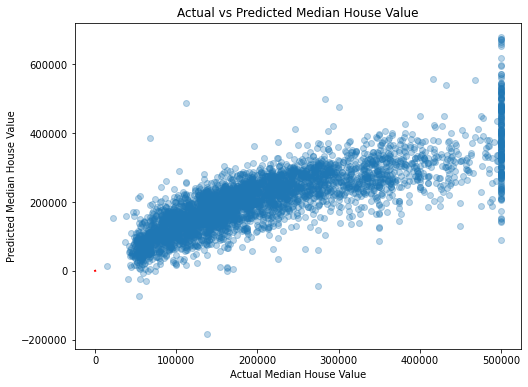

In [30]:
# Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Diagonal line
plt.show()

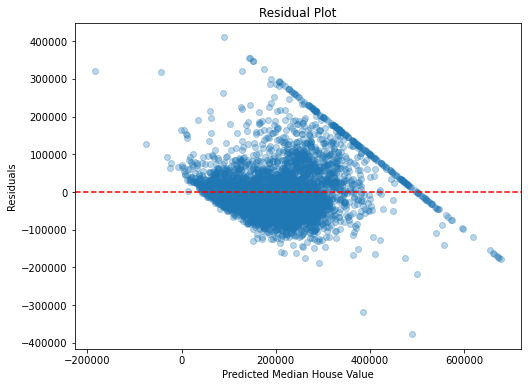

In [31]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

This script now includes additional plots to help visualize the data and the performance of the Lasso regression model:

Histogram of Target Variable: Shows the distribution of median_house_value.
Feature Importance Plot: Displays the coefficients from the Lasso model to show the importance of each feature.
Predicted vs Actual Plot: Compares the model predictions with the actual values.
Residual Plot: Helps identify any patterns in the residuals that might indicate model issues.
These visualizations should give you a better understanding of the data and how well the model is performing.